In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df=pd.DataFrame(data['data'],columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
from sklearn.preprocessing import StandardScaler
sts_scaler=StandardScaler()
sts_scaler.fit(df)
sacled_data=sts_scaler.transform(df)
sacled_data.shape

(569, 30)

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(sacled_data)
pca_data.shape

(569, 2)

In [52]:
from sklearn.decomposition import PCA
pca3=PCA(n_components=3)
pca_data3=pca3.fit_transform(sacled_data)
pca_data3.shape

(569, 3)

In [27]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=1)
pca_data1=pca1.fit_transform(sacled_data)
pca_data1.shape

(569, 1)

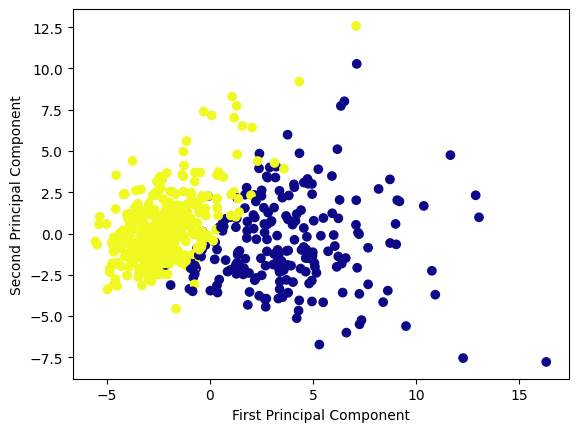

In [19]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=data['target'],cmap='plasma')
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

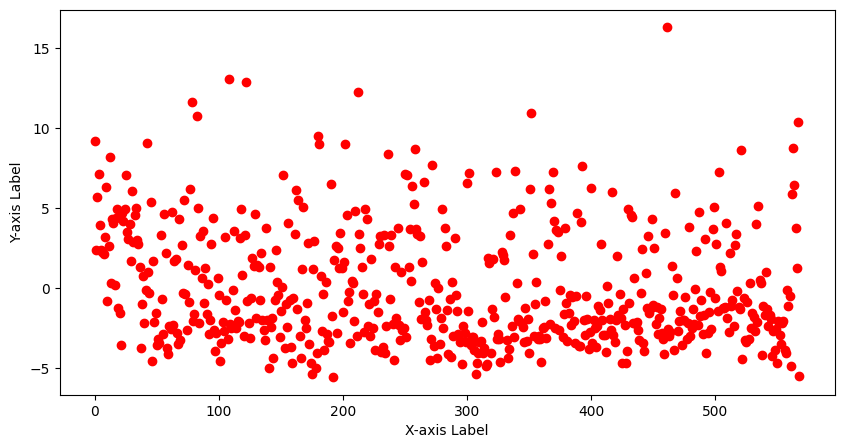

In [50]:
plt.figure(figsize=(10,5))
x = np.arange(len(pca_data1))  # x-values (indices) or your custom x-values
y = pca_data1                  # y-values (the data)

# Scatter plot
plt.scatter(x, y, color='red', label='Data Points')

# Labeling axes
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

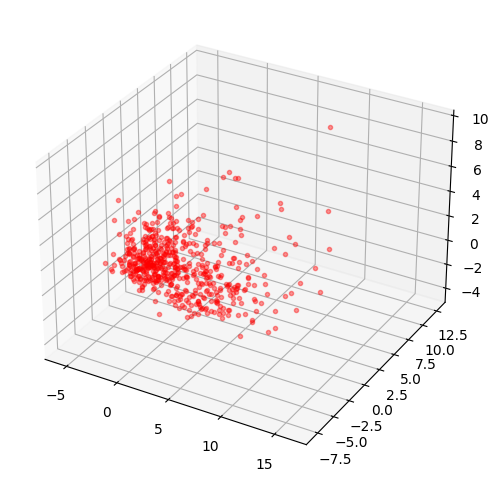

In [74]:
plt.figure(figsize=(6,10))
ax=plt.axes(projection='3d')
ax.plot3D(pca_data3[:,0],pca_data3[:,1],pca_data3[:,2],".",alpha=0.4,c="red")
plt.show()

In [20]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<Axes: >

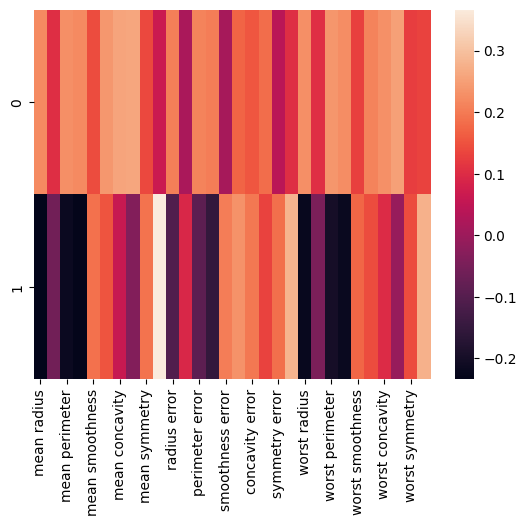

In [21]:
df_comp=pd.DataFrame(pca.components_,columns=data['feature_names'])
sns.heatmap(df_comp)